In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
import datetime
import pickle


# 데이터 읽기 및 전처리

cond1_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition1.csv")
cond1_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition1.csv")
cond1_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition1.csv")
cond1_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition1.csv")



cond2_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition2.csv")
cond2_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition2.csv")
cond2_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition2.csv")
cond2_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition2.csv")

cond3_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition3.csv")
cond3_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition3.csv")
cond3_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition3.csv")
cond3_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition3.csv")

# 데이터 읽기 및 전처리
df_topic_day = pd.read_csv("../../R/data/topic_day_panel.csv")



전처리

In [55]:
cond1_sede = pd.concat([cond1_treat_0_1
                    , cond1_treat_0_2
                    , cond1_treat_1_1
                    , cond1_treat_1_2], axis = 0)
cond2_sede = pd.concat([  cond2_treat_0_1
                        , cond2_treat_0_2
                        , cond2_treat_1_1
                        , cond2_treat_1_2], axis = 0)

cond3_sede = pd.concat([  cond3_treat_0_1
                        , cond3_treat_0_2
                        , cond3_treat_1_1
                        , cond3_treat_1_2], axis = 0)

In [56]:
cond1_sede = cond1_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond1_sede.columns[1:])
cond2_sede = cond2_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond2_sede.columns[1:])
cond3_sede = cond3_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond3_sede.columns[1:])

In [57]:
cond1_sede['cdate'] = pd.to_datetime(cond1_sede['cdate'])
cond2_sede['cdate'] = pd.to_datetime(cond2_sede['cdate'])
cond3_sede['cdate'] = pd.to_datetime(cond3_sede['cdate'])

df_topic_day['date'] = pd.to_datetime(df_topic_day['date'])

In [58]:
cond1_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond2_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond3_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']

In [59]:
cond1_sede.loc[cond1_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond2_sede.loc[cond2_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond3_sede.loc[cond3_sede['sede_tag'] =='net', 'sede_tag']='.net'

In [60]:
cond1_sede_yn = cond1_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond2_sede_yn = cond2_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond3_sede_yn = cond3_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()

In [61]:
cond1_sede_yn['cdate'] = pd.to_datetime(cond1_sede_yn['cdate'])
cond2_sede_yn['cdate'] = pd.to_datetime(cond2_sede_yn['cdate'])
cond3_sede_yn['cdate'] = pd.to_datetime(cond3_sede_yn['cdate'])

In [62]:
# treat_0_1_condition1.csv
# cast(creationdate as date) between '2021-10-06' and '2021-12-31'
# treat_0_2_condition1.csv
# cast(creationdate as date) between '2022-01-01' and '2022-03-15'
# treat_1_1_condition1.csv
# cast(creationdate as date) between '2022-10-05' and '2022-12-31'
# treat_1_2_condition1.csv
# cast(creationdate as date) between '2023-01-01' and '2023-03-14'

###################################################################################condition1
cond1 = cond1_sede_yn['cdate']>='2021-10-06'
cond2 = cond1_sede_yn['cdate']<='2022-03-15'
cond3 = cond1_sede_yn['cdate']>='2022-10-05'
cond4 = cond1_sede_yn['cdate']<='2023-03-14'


###################################################################################condition2
cond5 = cond2_sede_yn['cdate']>='2021-10-06'
cond6 = cond2_sede_yn['cdate']<='2022-03-15'
cond7 = cond2_sede_yn['cdate']>='2022-10-05'
cond8 = cond2_sede_yn['cdate']<='2023-03-14'


###################################################################################condition3
cond9  = cond3_sede_yn['cdate']>='2021-10-06'
cond10 = cond3_sede_yn['cdate']<='2022-03-15'
cond11 = cond3_sede_yn['cdate']>='2022-10-05'
cond12 = cond3_sede_yn['cdate']<='2023-03-14'


In [63]:
###################################################################################condition1
cond1_sede_yn.loc[(cond1&cond2), 'rel_days'] = cond1_sede_yn.loc[(cond1&cond2), 'cdate'] - datetime.datetime(2021,12,1)
cond1_sede_yn.loc[(cond3&cond4), 'rel_days'] = cond1_sede_yn.loc[(cond3&cond4), 'cdate'] - datetime.datetime(2022,11,30)

###################################################################################condition2
cond2_sede_yn.loc[(cond5&cond6), 'rel_days'] = cond2_sede_yn.loc[(cond5&cond6), 'cdate'] - datetime.datetime(2021,12,1)
cond2_sede_yn.loc[(cond7&cond8), 'rel_days'] = cond2_sede_yn.loc[(cond7&cond8), 'cdate'] - datetime.datetime(2022,11,30)

###################################################################################condition3
cond3_sede_yn.loc[(cond9&cond10),  'rel_days'] = cond3_sede_yn.loc[(cond9&cond10),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_yn.loc[(cond11&cond12), 'rel_days'] = cond3_sede_yn.loc[(cond11&cond12), 'cdate'] - datetime.datetime(2022,11,30)

In [64]:
###################################################################################condition1
cond1_sede_yn.loc[(cond1&cond2), 'treat'] = 0
cond1_sede_yn.loc[(cond3&cond4), 'treat'] = 1

###################################################################################condition2
cond2_sede_yn.loc[(cond5&cond6), 'treat'] = 0
cond2_sede_yn.loc[(cond7&cond8), 'treat'] = 1


###################################################################################condition3
cond3_sede_yn.loc[(cond9&cond10), 'treat'] = 0
cond3_sede_yn.loc[(cond11&cond12), 'treat'] = 1


In [65]:
###################################################################################condition1
cond1_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)

###################################################################################condition2
cond2_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)


###################################################################################condition3
cond3_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)


In [66]:
###################################################################################condition1
cond1_sede_yn[['treat', 'rel_week']] = cond1_sede_yn[['treat', 'rel_week']].astype(int)
###################################################################################condition2
cond2_sede_yn[['treat', 'rel_week']] = cond2_sede_yn[['treat', 'rel_week']].astype(int)

###################################################################################condition3
cond3_sede_yn[['treat', 'rel_week']] = cond3_sede_yn[['treat', 'rel_week']].astype(int)


In [67]:
# rel_week을 범주형 변수로 변환 (주차별 처리)

###################################################################################condition1
cond1_sede_yn['rel_week'] = pd.Categorical(cond1_sede_yn['rel_week'])

###################################################################################condition2
cond2_sede_yn['rel_week'] = pd.Categorical(cond2_sede_yn['rel_week'])

###################################################################################condition3
cond3_sede_yn['rel_week'] = pd.Categorical(cond3_sede_yn['rel_week'])

df_topic_day['rel_week'] = pd.Categorical(df_topic_day['rel_week'])


In [68]:
# .net의 경우 데이터가 비어있어 분석에서 제외
###################################################################################condition1
cond1_sede_yn = cond1_sede_yn[cond1_sede_yn['sede_tag'] != '.net']

###################################################################################condition2
cond2_sede_yn = cond2_sede_yn[cond2_sede_yn['sede_tag'] != '.net']

###################################################################################condition3
cond3_sede_yn = cond3_sede_yn[cond3_sede_yn['sede_tag'] != '.net']


df_topic_day = df_topic_day[df_topic_day['tag'] != '.net']


In [69]:
cond1_sede_yn = cond1_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [70]:
cond3_sede_yn = cond3_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [71]:
cond2_sede_yn = cond2_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [72]:
###################################################################################condition1
cond1_sede_yn = cond1_sede_yn.set_index(['sede_tag', 'cdate'])

###################################################################################condition2
cond2_sede_yn = cond2_sede_yn.set_index(['sede_tag', 'cdate'])

###################################################################################condition3
cond3_sede_yn = cond3_sede_yn.set_index(['sede_tag', 'cdate'])

df_topic_day = df_topic_day.set_index(['tag', 'date'])


### 모델적용

In [73]:
periods = np.arange(-7, 15, 1)

#### Q1.

##### Target 

In [74]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
mod_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_topic_day)
result_dyn = mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [75]:
# 동적 효과 계수 추출
coefs = result_dyn.params
std_errors = result_dyn.std_errors
conf_int = result_dyn.conf_int()

In [76]:
coefs_filtered      = coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
std_errors_filtered = std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values

In [77]:
# 신뢰구간 계산
ll_95 = coefs_filtered - 1.965 * std_errors_filtered
ul_95 = coefs_filtered + 1.965 * std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : coefs_filtered,
    'll_95'     : ll_95,
    'ul_95'     : ul_95
})

##### Condition1

In [78]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond1_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond1_sede_yn)
cond1_result_dyn = cond1_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)

In [79]:
# 동적 효과 계수 추출
cond1_coefs = cond1_result_dyn.params
cond1_std_errors = cond1_result_dyn.std_errors
cond1_conf_int = cond1_result_dyn.conf_int()

In [80]:
cond1_coefs_filtered      = cond1_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond1_std_errors_filtered = cond1_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values



In [81]:
# 신뢰구간 계산
cond1_ll_95 = cond1_coefs_filtered - 1.965 * cond1_std_errors_filtered
cond1_ul_95 = cond1_coefs_filtered + 1.965 * cond1_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond1_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond1_coefs_filtered,
    'll_95'     : cond1_ll_95,
    'ul_95'     : cond1_ul_95
})

##### Condition2

In [82]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond2_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond2_sede_yn)
cond2_result_dyn = cond2_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [83]:
# 동적 효과 계수 추출
cond2_coefs         = cond2_result_dyn.params
cond2_std_errors    = cond2_result_dyn.std_errors
cond2_conf_int      = cond2_result_dyn.conf_int()

In [84]:
cond2_coefs_filtered      = cond2_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond2_std_errors_filtered = cond2_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [85]:
# 신뢰구간 계산
cond2_ll_95 = cond2_coefs_filtered - 1.965 * cond2_std_errors_filtered
cond2_ul_95 = cond2_coefs_filtered + 1.965 * cond2_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond2_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond2_coefs_filtered,
    'll_95'     : cond2_ll_95,
    'ul_95'     : cond2_ul_95
})

##### Condition3

In [86]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_yn)
cond3_result_dyn = cond3_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [87]:
# 동적 효과 계수 추출
cond3_coefs = cond3_result_dyn.params
cond3_std_errors = cond3_result_dyn.std_errors
cond3_conf_int = cond3_result_dyn.conf_int()

In [88]:
cond3_coefs_filtered      = cond3_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_std_errors_filtered = cond3_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [89]:
# 신뢰구간 계산
cond3_ll_95 = cond3_coefs_filtered - 1.965 * cond3_std_errors_filtered
cond3_ul_95 = cond3_coefs_filtered + 1.965 * cond3_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_coefs_filtered,
    'll_95'     : cond3_ll_95,
    'ul_95'     : cond3_ul_95
})

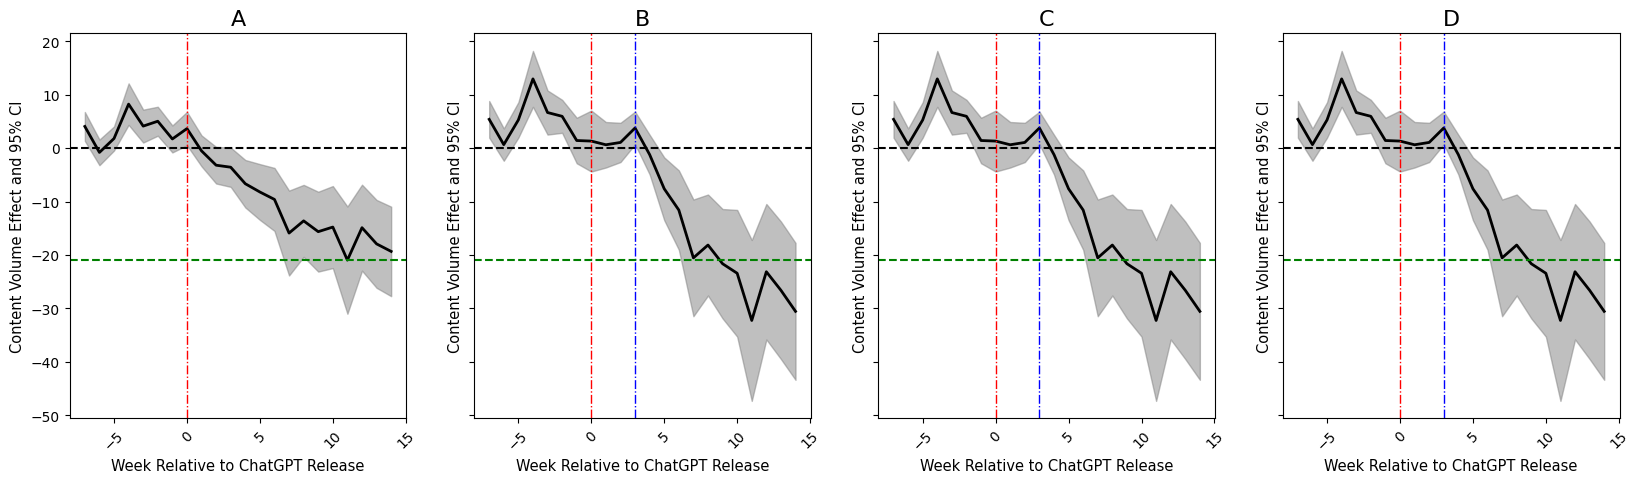

In [90]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("A", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond1_df_coefs['period'], cond1_df_coefs['ll_95'], cond1_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond1_df_coefs['period'], cond1_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("B", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

axs[2].fill_between(cond2_df_coefs['period'], cond2_df_coefs['ll_95'], cond2_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond2_df_coefs['period'], cond2_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("C", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)


axs[3].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("D", fontsize=16)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();